This notebook will show the use of a gap surface plasmon structure used to enhance the lateral shift magnitude.

In [1]:
from TMMulti import *
import numpy as np

import matplotlib.pyplot as plt
import os
#from NanoFan import *
from scipy.optimize import curve_fit
from scipy import optimize
from scipy.interpolate import CubicSpline
#import gdstk
import csv
import pandas as pd
import tidy3d as td
from tidy3d import web
from GSPModel import *
#from Pores3D import *
import trimesh
from IPython.display import Image, display

## Insipired by :

We will use a wavelength of 633e-9 nm, the structure will consist of gold metal layers either side a semi-conductor dielectric, in this case a high refractive index low loss material is needed. Silicon would be perfect if it wasn't for its visible light band-gap. Instead we propose the use of silicon nitride. Higher index prisms allow for better coupling to plasmon polaritons so we use SF11 for the duration of this investigation.

In [158]:
#below are all done for 633nm

gold_nk = 0.18344 + 3.4332j
silicon_ni=2.03488 #2.0394 
prism_nk = 1.778
water_nk = 1.3317

For 30 nm gold we can vary the thickness of the silicon dielectric and see if we get any resonant lateral shift peaks.

The cavity mode condition is given by $2 n L = m \lambda$. So for 633 nm we would expect modes at $L = \frac{m \lambda}{2 n} = \frac{m \times 633}{2 \times 2.0394}$

In [3]:
print ("Therefore we expect modes at multiples of" ,633/(2*2.0394),"nm")

Therefore we expect modes at multiples of 155.19270373639304 nm


Of course due to coupling with the plasmon condition the mode should be slightly shifted away from this value.

## First mode effect on the lateral shift.

In [4]:
steps = 100

gold_thick = 30e-9
di_thick = np.linspace(100e-9,200e-9,steps)
layers=[]

for l in range(steps):
    layer = (gold_thick, di_thick[l], gold_thick)
    layers.append(layer)

In [5]:
gh_max, ind_max, gh, ind = layer_sweep(start_angle=40, 
               end_angle=89, 
               nk_prism=1.778,
               nk_layers=[gold_nk,silicon_ni,gold_nk], 
               layer_list=layers, 
               nk_sample=water_nk,
               nk_backlayer=water_nk, 
               sample_thickness=100e-100,   
               wavelength=633e-9,
               period=1,
               plot='off',
              scans=10000)

Lets plot the results as a function of dielectric layer thickness.

In [6]:
thicks=[]

for i in range(len(layers)):
    l = layers[i][1]
    thicks.append(l)

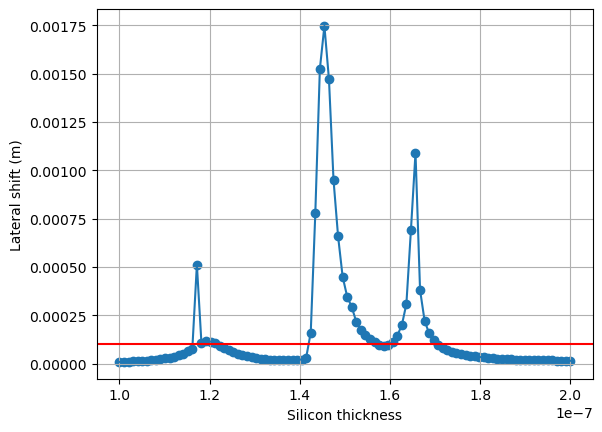

In [7]:
plt.scatter(thicks,gh)
plt.plot(thicks,gh)
plt.xlabel("Silicon thickness")
plt.ylabel("Lateral shift (m)")
plt.grid(True)
plt.axhline(0.0001, color='r')
#plt.xticks(np.linspace(0,2.5e-7,10))
plt.show()

The results are interesing, for thicknesses of 145nm (close to the expected cavity mode condition), the shift magnitude is increased to almost 2mm, furthermore, to remain at a shift magnitude minimum of 1e-4, the thickness uncertainty can be up to -3nm, +8nm.

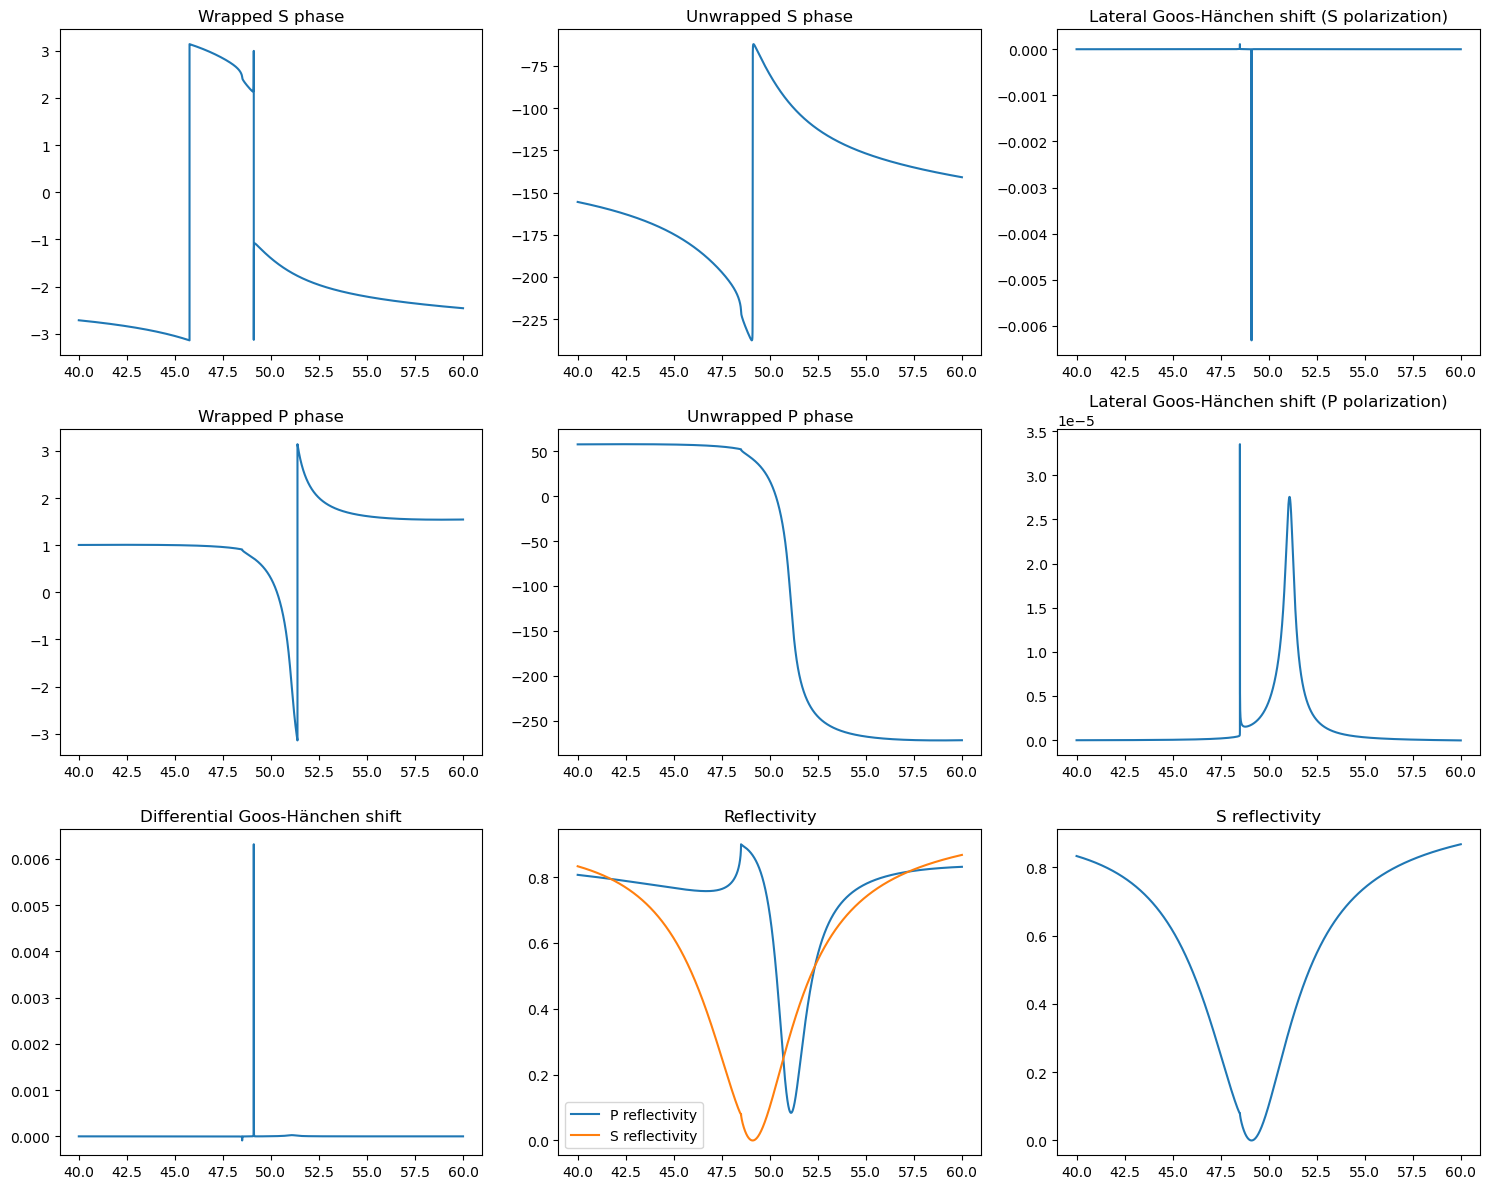

In [206]:
unw_pphas, unw_sphas, sphas, pphas, sref, prefx, gh_shift_px, gh_shift_s, diff_gh, anglesx = scan_angle(start_angle=40, 
               end_angle=60, 
               nk_prism=prism_nk, 
               nk_layers=[gold_nk,silicon_ni,gold_nk], 
               nk_sample=water_nk,
               nk_backlayer=water_nk, 
               sample_thickness=10e-100,  
               layer_thicknesses=layers[ind_max], 
               wavelength=633e-9,
               period=1,
               plot='on',
              scans=100000)

(0.0, 1e-06)

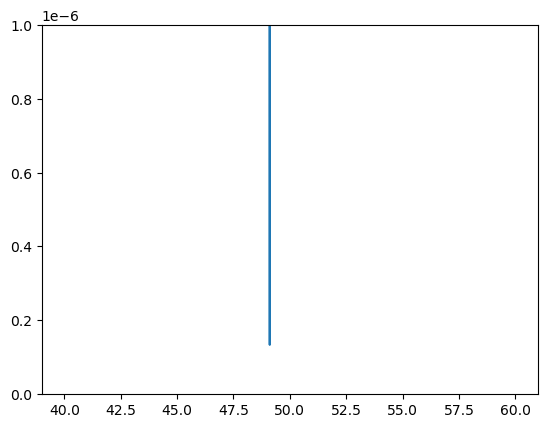

In [213]:
plt.plot(anglesx, sref)
plt.plot(anglesx,prefx)
plt.ylim(0,0.000001)

The proximity to zero seems to be the key, the configuration shows near perfect absorption.

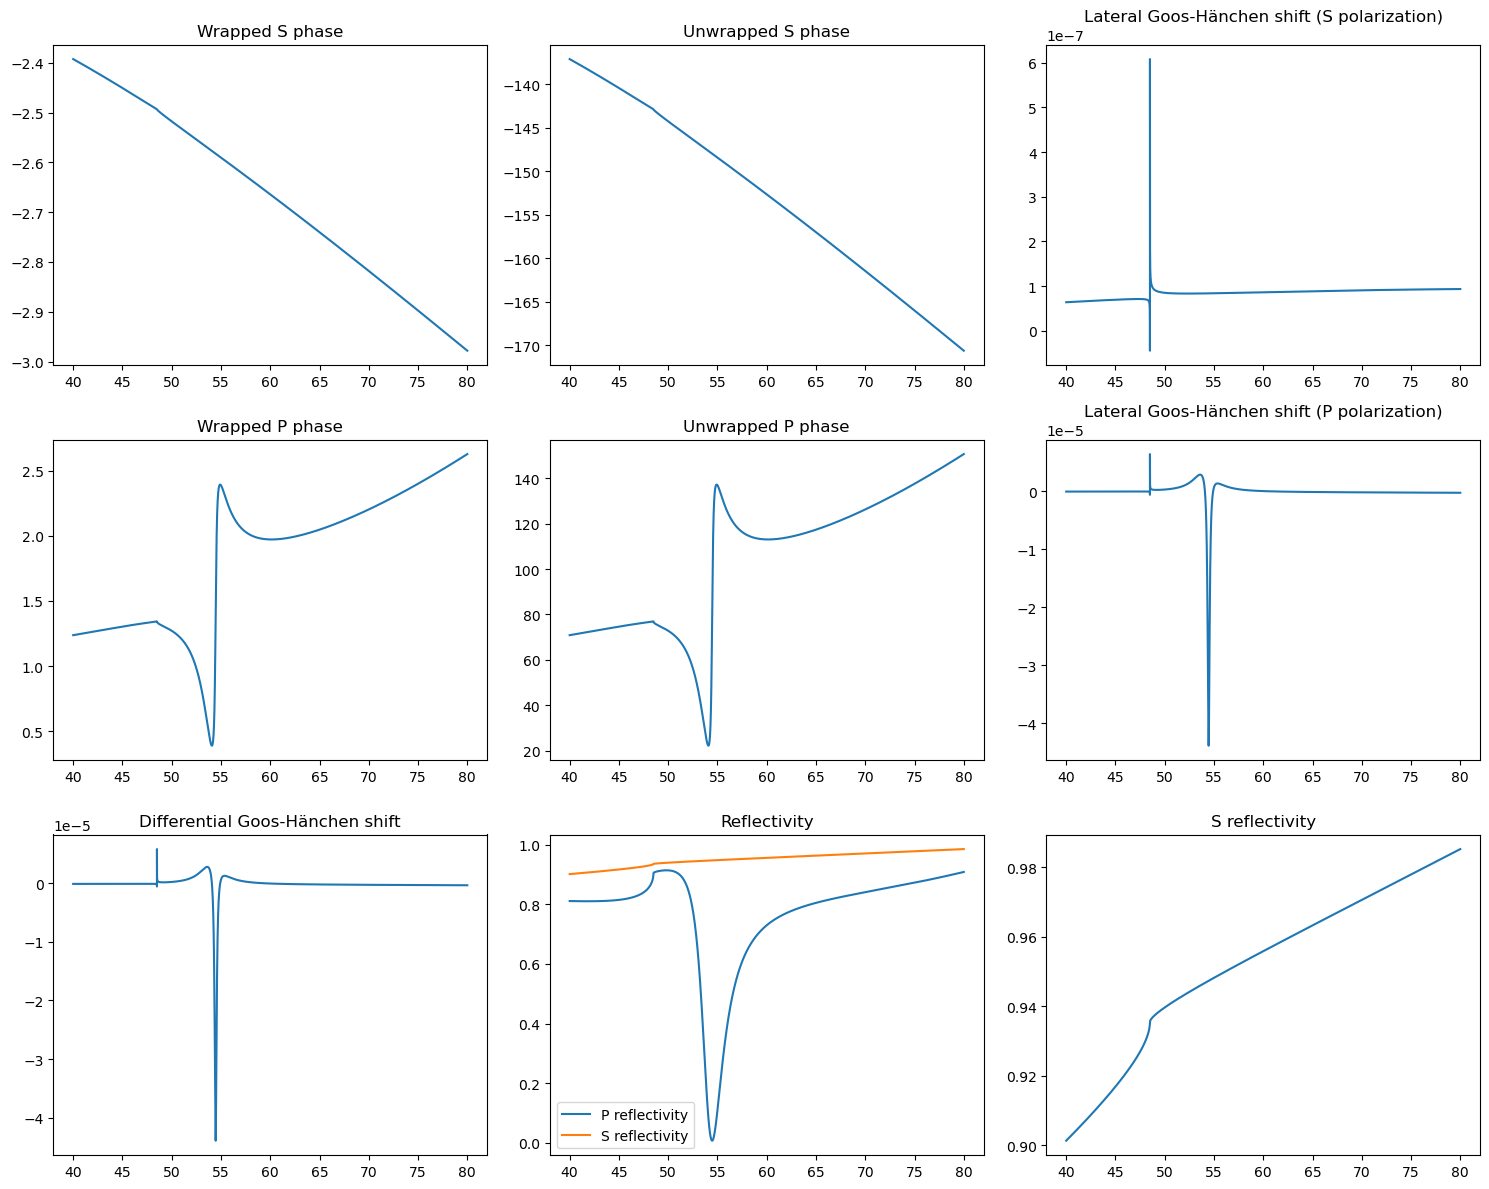

In [214]:
unw_pphas, unw_sphas, sphas, pphas, sref, prefx, gh_shift_px, gh_shift_s, diff_gh, anglesx = scan_angle(start_angle=40, 
               end_angle=80, 
               nk_prism=prism_nk, 
               nk_layers=[gold_nk,gold_nk], 
               nk_sample=water_nk,
               nk_backlayer=water_nk, 
               sample_thickness=10e-100,  
               layer_thicknesses=[25e-9,25e-9], 
               wavelength=633e-9,
               period=1,
               plot='on',
              scans=100000)

(0.0, 0.01)

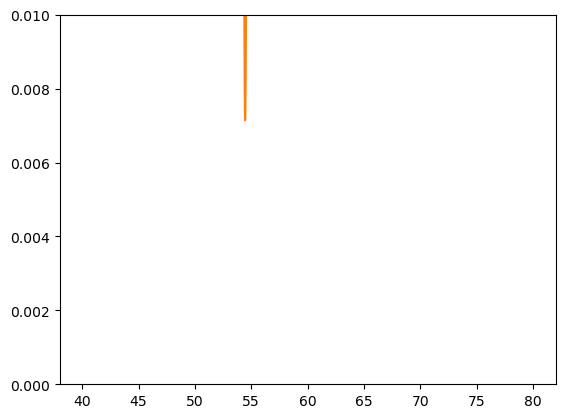

In [219]:
plt.plot(anglesx, sref)
plt.plot(anglesx,prefx)
plt.ylim(0,0.01)

Conventional gold does not get close.

In [39]:
unw_pphas, unw_sphas, sphas, pphas, sref, prefx, gh_shift_px, gh_shift_s1, diff_gh, anglesx = scan_angle(start_angle=45, 
               end_angle=55, 
               nk_prism=prism_nk, 
               nk_layers=[gold_nk,silicon_ni,gold_nk], 
               nk_sample=water_nk,
               nk_backlayer=water_nk, 
               sample_thickness=10e-100,  
               layer_thicknesses=layers[ind_max], 
               wavelength=633e-9,
               period=1,
               plot='off',
              scans=10000)

In [40]:
unw_pphas, unw_sphas, sphas, pphas, sref, prefx, gh_shift_px, gh_shift_s2, diff_gh, anglesx = scan_angle(start_angle=45, 
               end_angle=55, 
               nk_prism=prism_nk, 
               nk_layers=[gold_nk,silicon_ni,gold_nk], 
               nk_sample=water_nk+0.01,
               nk_backlayer=water_nk+0.01, 
               sample_thickness=10e-100,  
               layer_thicknesses=layers[ind_max], 
               wavelength=633e-9,
               period=1,
               plot='off',
              scans=10000)

But if the mechanism of the s polarisation reflectivity dip is the cavity mode, will the sample layer perturb the resonance as strongly. The answer is yes! For a small change in the sample refractive index we still see large changes inthe lateral shift magnitude.

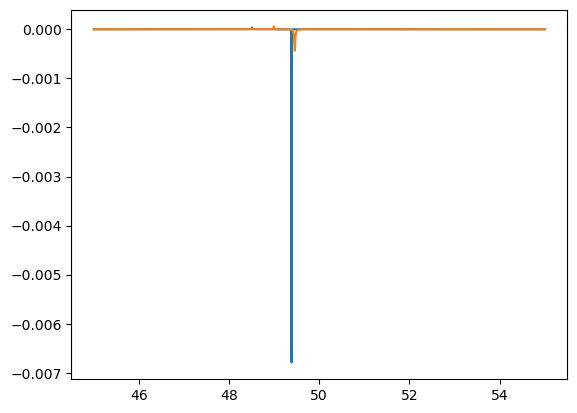

In [41]:
plt.plot(anglesx, gh_shift_s1)
plt.plot(anglesx, gh_shift_s2)

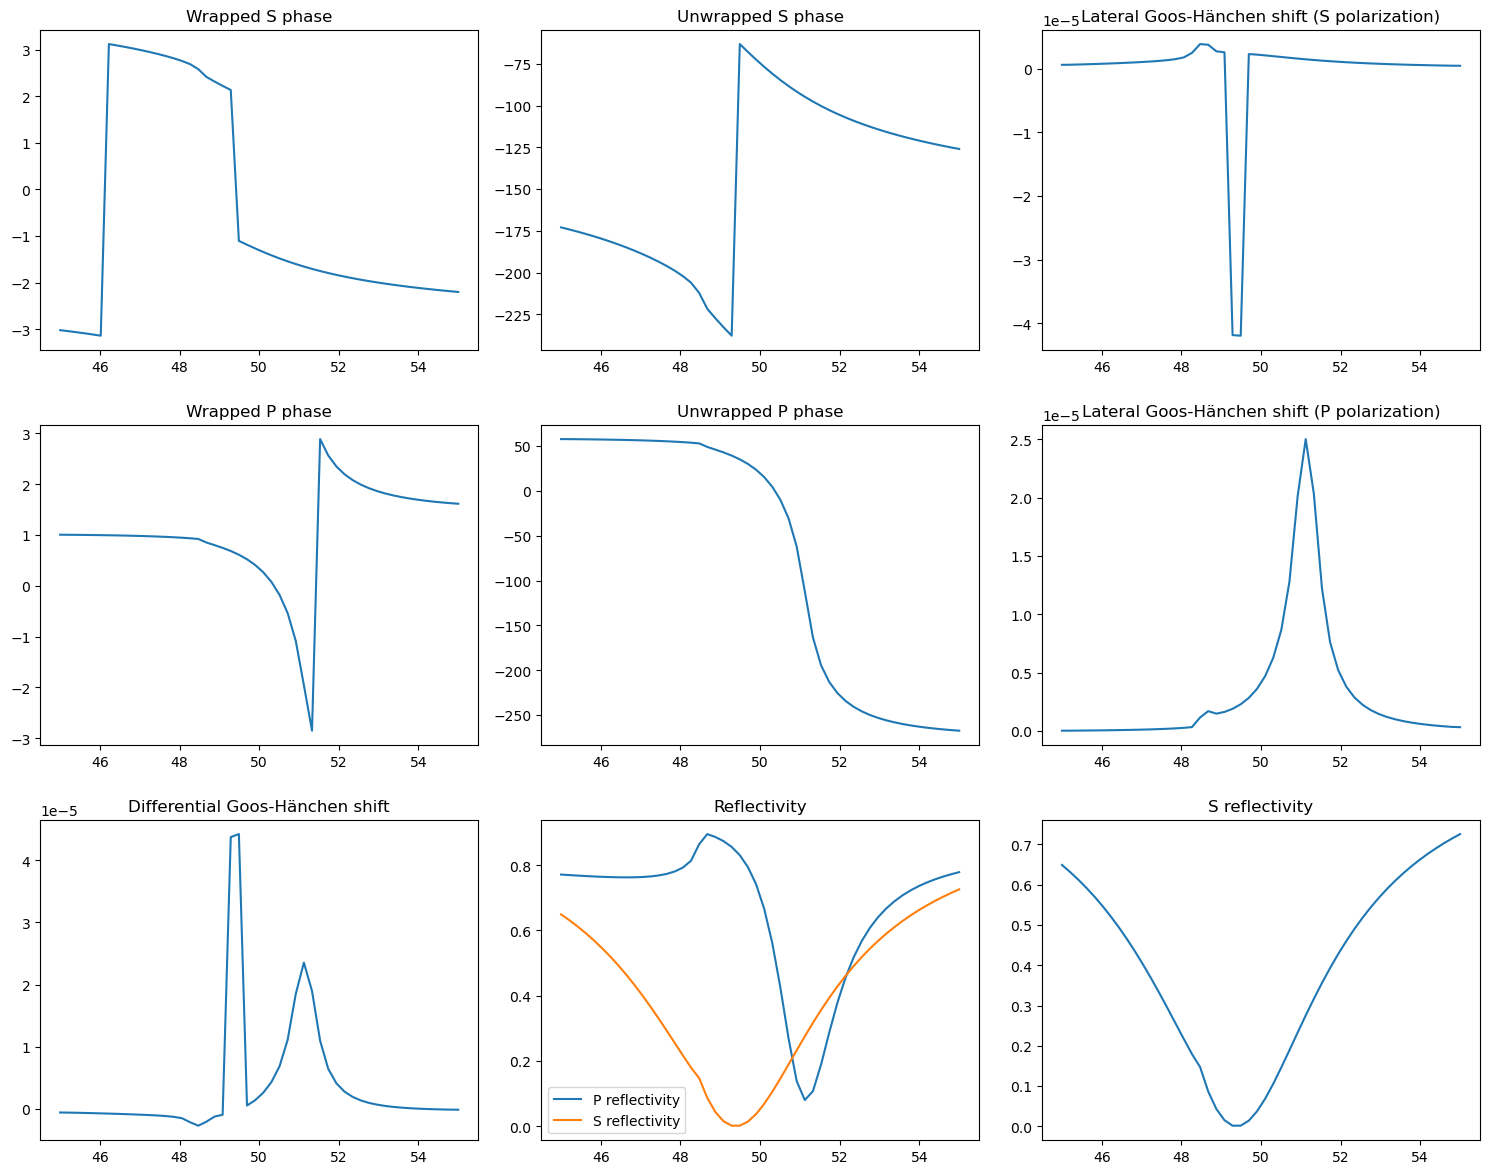

In [35]:
unw_pphas, unw_sphas, sphas, pphas, sref, prefx, gh_shift_px, gh_shift_sx, diff_ghx, anglesx = scan_angle(start_angle=45, 
               end_angle=55, 
               nk_prism=prism_nk, 
               nk_layers=[gold_nk,silicon_ni,gold_nk], 
               nk_sample=water_nk,
               nk_backlayer=water_nk, 
               sample_thickness=10e-100,  
               layer_thicknesses=layers[ind_max], 
               wavelength=633e-9,
               period=1,
               plot='on',
              scans=50)

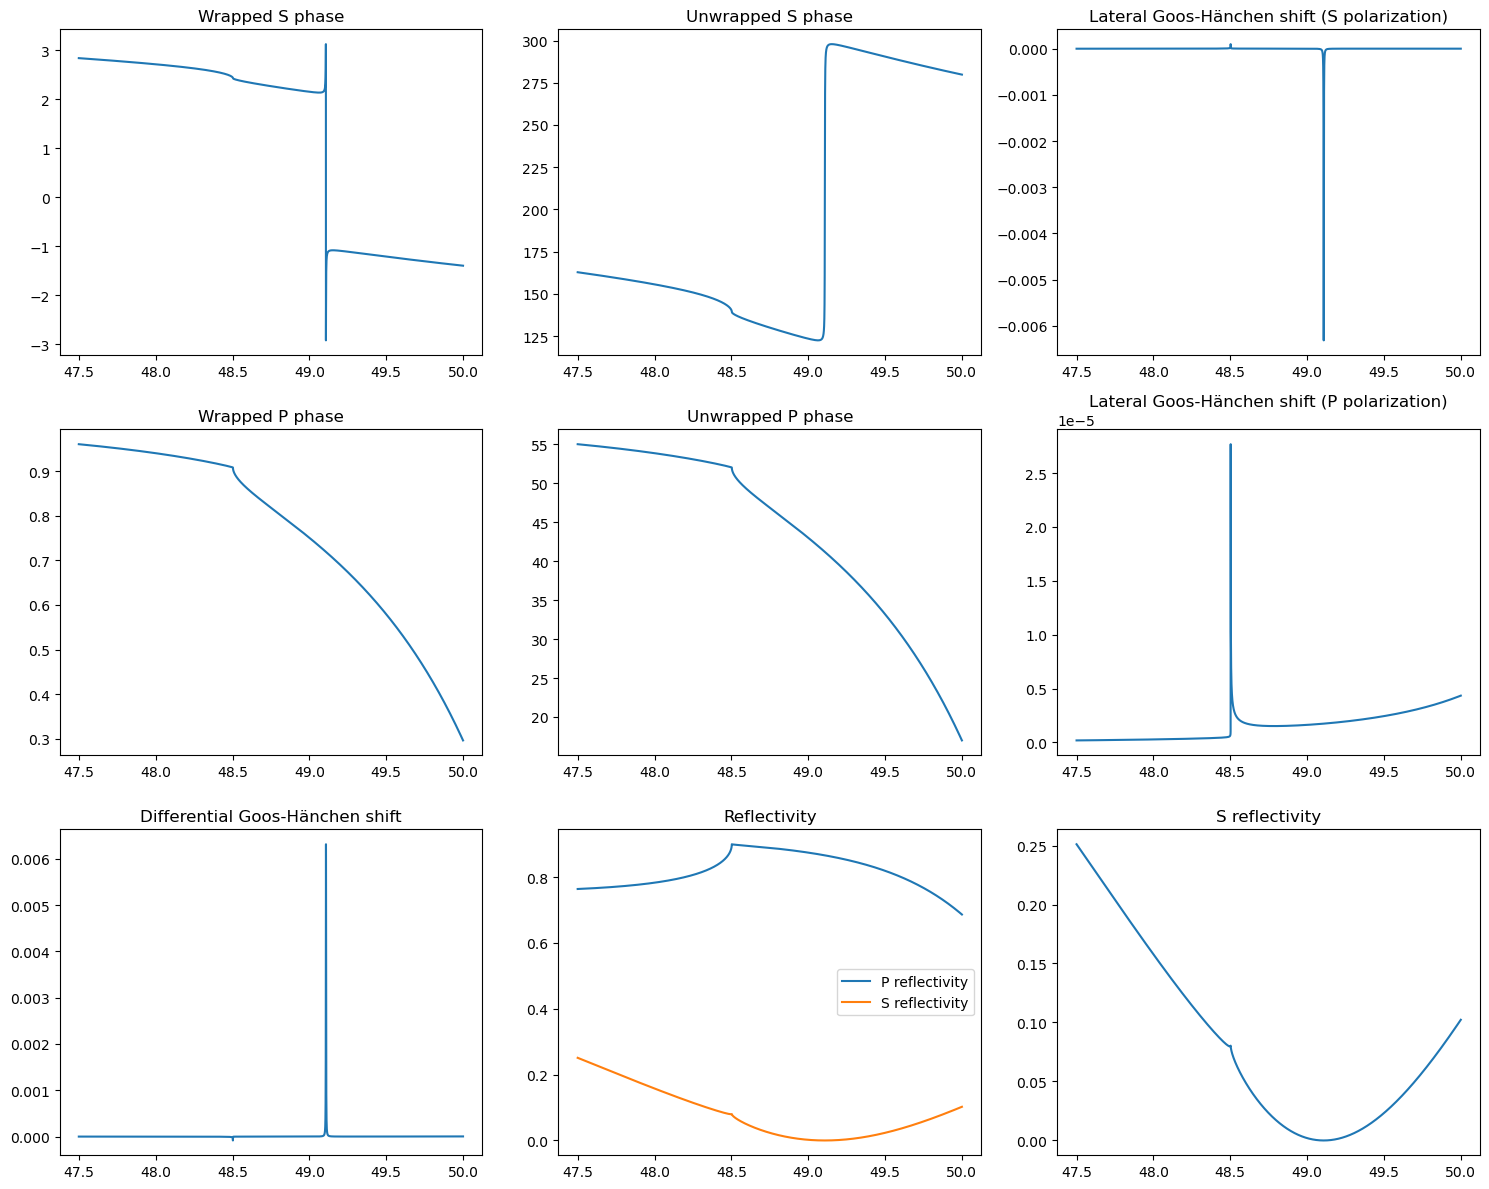

In [205]:
unw_pphas, unw_sphas, sphas, pphas, sref, prefx, gh_shift_px, gh_shift_sx, diff_ghx, anglesx = scan_angle(start_angle=47.5, 
               end_angle=50, 
               nk_prism=prism_nk, 
               nk_layers=[gold_nk,silicon_ni,gold_nk], 
               nk_sample=water_nk,
               nk_backlayer=water_nk, 
               sample_thickness=10e-100,  
               layer_thicknesses=layers[ind_max], 
               wavelength=633e-9,
               period=1,
               plot='on',
              scans=10000)

In [113]:
sphas

array([ 2.99538239,  2.99523843,  2.99509444, ..., -1.62075546,
       -1.62096821, -1.6211809 ])

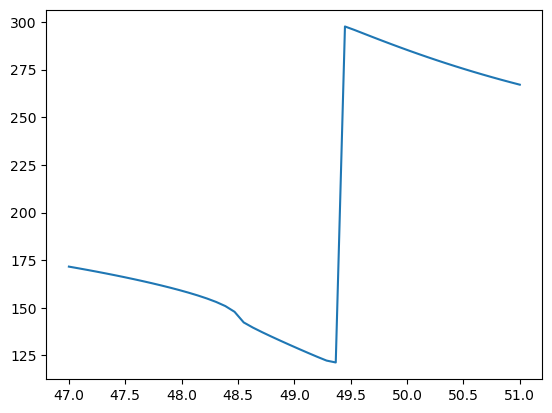

In [101]:
plt.plot(anglesx,np.degrees(np.unwrap(sphas)))

The dip proximities is an issue, perhaps small adjustments reducing the plasmon angle will make the lateral shifts in s and p more similar reducing the differential shift. Maybe in future the plasmon angle can be tuned far from the cavity mode resonance.

Simulations of the phase, reflectivity and lateral shift at this optimal thickness are even more suprising. The higher resolution scan shows an even higher than expected shift. However it seems to be the S-Polarisation that is contributing massively to the shift. At this angle there is  a reflectivty dip for the TE polarisation. Perhaps the TE polarisation is coupling more strongly to the cavity modes whilst the p polarisation couples only to the plasmon modes.

We can see some periodicity between the peaks alluding to the coupling of cavity modes to the plasmon condition.

The GSP configuration has a small FWHM, so would be great for sensing applications. Lets see whats happening with the electric fields in this material , we can simulated this in FDTD and shine light at and off the surface plasmon angle to image the field.

## First cavity mode resonance in FDTD

Since it is the s-polarisation that exhibits the largest reflectivity dip we will image this in FDTD. Then we will find the s polarised lateral shift.


If we plot the electric field at the theoretical S polarisation reflectivity minima we get this. It is clear that the mechanism for the reflectivity dip in TE is the excitation of the cavity mode. Perhaps the gold adjacent to the cavity mode interacts with the high electric field creating losses.

## S pol field in cavity mode

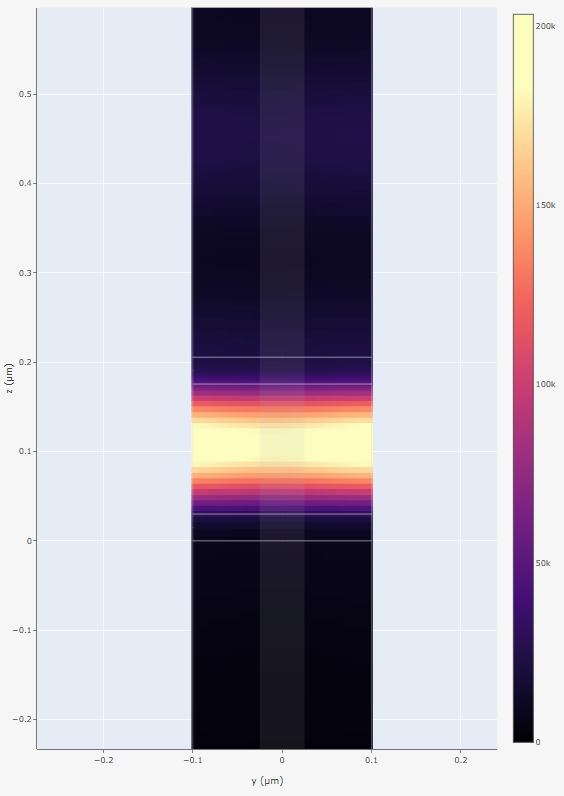

In [83]:
from IPython.display import Image, display

# Path to your image file
image_path = 'SPC.png'

# Display the image
display(Image(filename=image_path))

Plotting the P polarisation minima gives us this. As expected the field enhancement seems to be due to plasmon polariton excitation. The cavity mode does not seem to be excited strongly. 

## P pol field in cavity mode

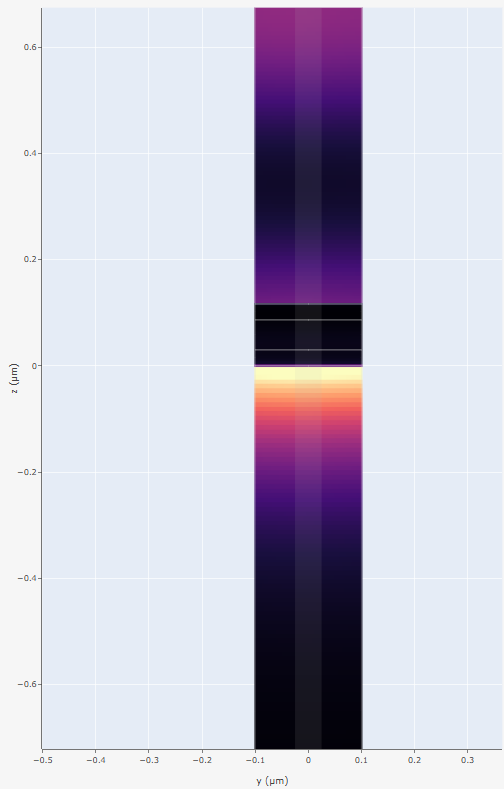

In [28]:
from IPython.display import Image, display

# Path to your image file
image_path = 'FPCav1.png'

# Display the image
display(Image(filename=image_path))

It seems in this structure that there each polarisation has its own mechanism to diminish reflectivity. Cavity mode energy dissipation for the s polarisation and surface plasmon resonance for the p. It is likely that the p polarisation modes overlap with the lossy plasmonic whereas s polarisation modes are confined in the dielectric and therefore can reflect and resonate strongly. This gives rise to the very near 0 s polarisation reflectivity dip.

In [20]:
sini_thick = layers[ind_max][1]*1e6

Plotting for angle 47.0


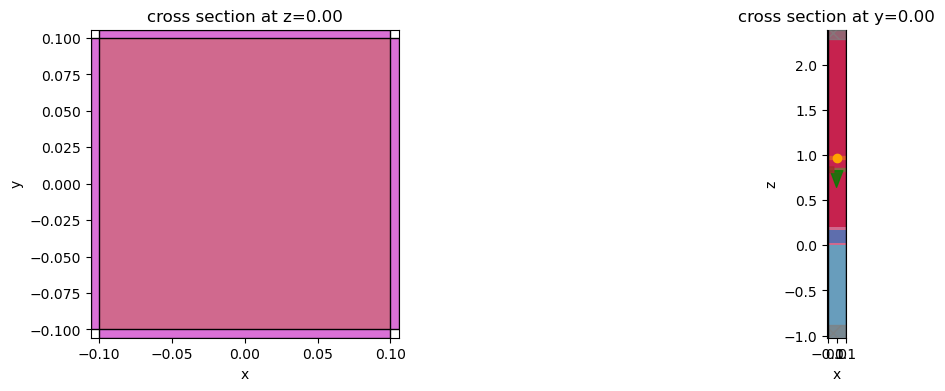

16:27:56 GMT Standard Time Created task 'Nanohole Array' with task_id           
                           'fdve-ab100b66-816e-4390-9f93-c3e87f103165' and      
                           task_type 'FDTD'.

                           View task using web UI at                            
                           ]8;id=94361;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ab100b66-816e-4390-9f93-c3e87f103165\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=51588;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ab100b66-816e-4390-9f93-c3e87f103165\taskId]8;;\]8;id=94361;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ab100b66-816e-4390-9f93-c3e87f103165\=]8;;\]8;id=901229;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ab100b66-816e-4390-9f93-c3e87f103165\fdv]8;;\
                           ]8;id=901229;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ab100b66-816e-4390-9f93-c3e87f103165\e]8;;\]8;id=94361;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ab100b66-816e-4390-9f93-c3e87f103165\-ab100b66-816e-4390-9f93-c3e87f103165']8;;\.

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

16:27:58 GMT Standard Time Maximum FlexCredit cost: 0.253. Minimum cost depends 
                           on task execution details. Use                       
                           'web.real_cost(task_id)' to get the billed FlexCredit
                           cost after a simulation run.

This simulation will cost 0.2529149948839259 flex credits
50 simulations will cost 12.645749744196294 flex credits


Proceed? 


C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

16:28:25 GMT Standard Time Started working on Batch containing 50 tasks.

16:29:51 GMT Standard Time Maximum FlexCredit cost: 12.646 for the whole batch.

                           Use 'Batch.real_cost()' to get the billed FlexCredit 
                           cost after the Batch has completed.

16:36:49 GMT Standard Time Batch complete.

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

16:37:35 GMT Standard Time WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

16:37:36 GMT Standard Time WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

16:37:37 GMT Standard Time WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

16:37:38 GMT Standard Time WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

16:37:39 GMT Standard Time WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

16:37:40 GMT Standard Time WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

16:37:41 GMT Standard Time WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

16:37:42 GMT Standard Time WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

16:37:43 GMT Standard Time WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

16:37:44 GMT Standard Time WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

16:37:45 GMT Standard Time WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

16:37:46 GMT Standard Time WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

16:37:47 GMT Standard Time WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

16:37:48 GMT Standard Time WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

In [93]:
phase, gh_shift, ref, angles = nanohole_scan(
    wavelength_range=(0.63299,0.633),
    Nfreqs=5,
    spacing=0.2,#spacing between holes
    metal_thickness=0.03,
    di_thickness= (sini_thick), #dielectric filkm thickness
    metal_material=(td.material_library["Au"]["JohnsonChristy1972"]),#using JC gold for now
    dielectric_material= (td.material_library['Si3N4']['Luke2015PMLStable']), #hole material
    prism_material=td.Medium(permittivity=1.778**2),
    sample_material=td.Medium(permittivity=water_nk**2),
    #angle,
    pol_angle=np.radians(90),
    run_t=500,
    grid_res=40,
    mesh_res=10,
    n_prism=1.778,
    sim_height=5,
    sim_centre=0.7,
    start_angle=47,
    end_angle=50,
    
    steps=50)

## Thin film vs Cavity mode plasmon comparison

(0.0, 0.4)

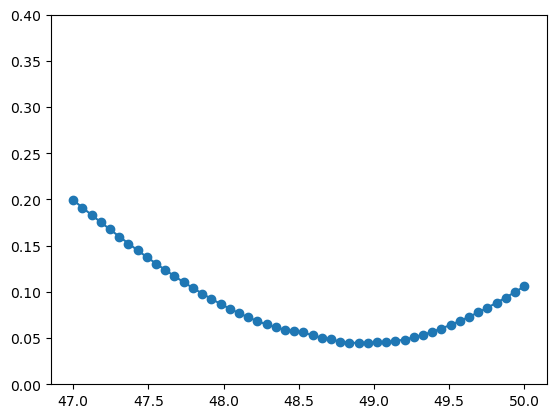

In [191]:
plt.plot(angles,ref)
plt.scatter(angles,ref)
plt.ylim(0,0.4)

The dip is recreated in FDTD using the same setup we used to monitor the electric field strength. Generally such near 0 reflectivities mean a volatile phase condition and large lateral shifts but it is hard to obtain a good resolution image of the shift.

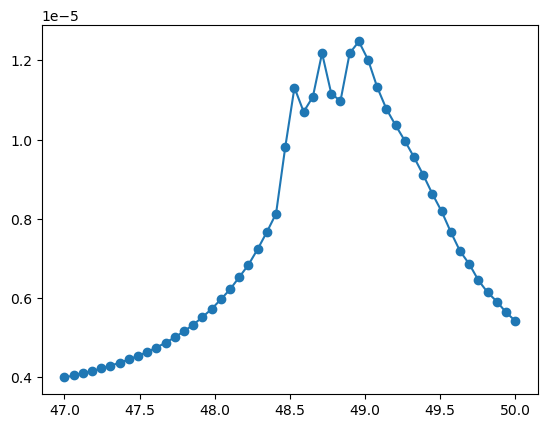

In [187]:
plt.plot(angles,gh_shift)
plt.scatter(angles,gh_shift)


Plotting for angle 48.7


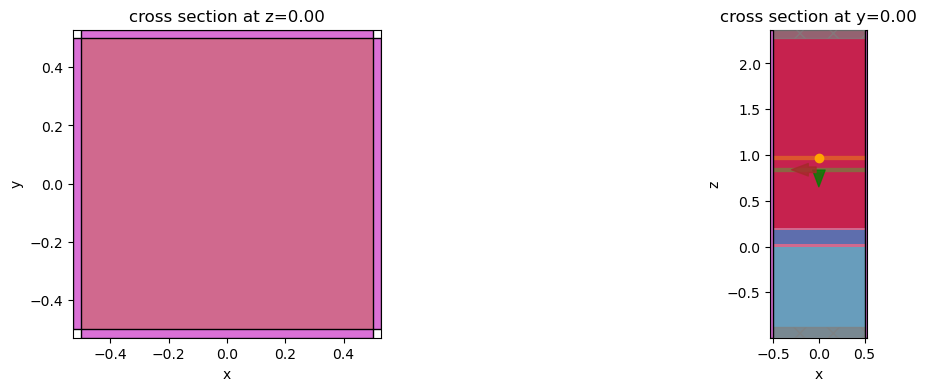

17:45:00 GMT Standard Time Created task 'Nanohole Array' with task_id           
                           'fdve-506334b5-f374-4da0-8fce-f199ce0a433b' and      
                           task_type 'FDTD'.

                           View task using web UI at                            
                           ]8;id=567333;https://tidy3d.simulation.cloud/workbench?taskId=fdve-506334b5-f374-4da0-8fce-f199ce0a433b\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=909837;https://tidy3d.simulation.cloud/workbench?taskId=fdve-506334b5-f374-4da0-8fce-f199ce0a433b\taskId]8;;\]8;id=567333;https://tidy3d.simulation.cloud/workbench?taskId=fdve-506334b5-f374-4da0-8fce-f199ce0a433b\=]8;;\]8;id=549548;https://tidy3d.simulation.cloud/workbench?taskId=fdve-506334b5-f374-4da0-8fce-f199ce0a433b\fdv]8;;\
                           ]8;id=549548;https://tidy3d.simulation.cloud/workbench?taskId=fdve-506334b5-f374-4da0-8fce-f199ce0a433b\e]8;;\]8;id=567333;https://tidy3d.simulation.cloud/workbench?taskId=fdve-506334b5-f374-4da0-8fce-f199ce0a433b\-506334b5-f374-4da0-8fce-f199ce0a433b']8;;\.

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

17:45:03 GMT Standard Time Maximum FlexCredit cost: 6.704. Minimum cost depends 
                           on task execution details. Use                       
                           'web.real_cost(task_id)' to get the billed FlexCredit
                           cost after a simulation run.

This simulation will cost 6.703655470013013 flex credits
50 simulations will cost 335.1827735006506 flex credits


KeyboardInterrupt: Interrupted by user

In [203]:
phase2, gh_shift2, ref2, angles2 = nanohole_scan(
    wavelength_range=(0.63299,0.633),
    Nfreqs=5,
    spacing=1,#spacing between holes
    metal_thickness=0.03,
    di_thickness= (sini_thick), #dielectric filkm thickness
    metal_material=(td.material_library["Au"]["JohnsonChristy1972"]),#using JC gold for now
    dielectric_material= (td.material_library['Si3N4']['Luke2015PMLStable']), #hole material
    prism_material=td.Medium(permittivity=1.778**2),
    sample_material=td.Medium(permittivity=water_nk**2),
    #angle,
    pol_angle=np.radians(90),
    run_t=500,
    grid_res=50,
    mesh_res=10,
    n_prism=1.778,
    sim_height=5,
    sim_centre=0.7,
    start_angle=48.7,
    end_angle=49.5,
    
    steps=50)

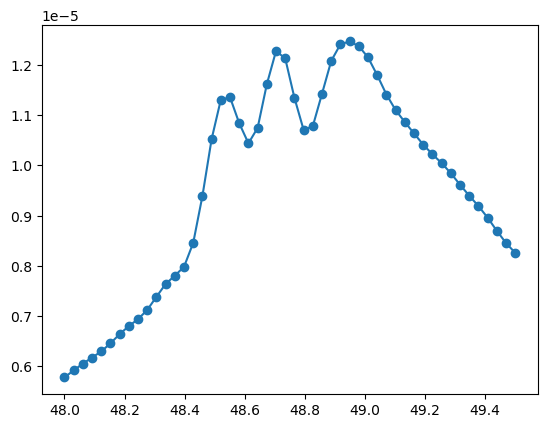

In [190]:
plt.plot(angles2, gh_shift2)
plt.scatter(angles2, gh_shift2)
#plt.plot(anglesx, sphas)
#plt.xlim(48,49.4)

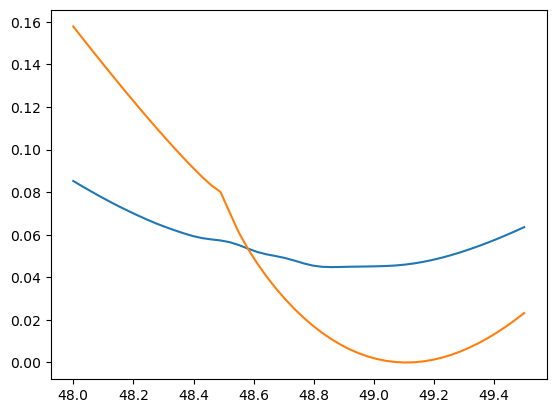

In [163]:
plt.plot(angles2, ref2)
plt.plot(anglesx,sref)

We can see the reflectivity reaches extremely close to 0 alluding to a high phase differential.

## Investigation into other cavity mode peaks

Is the TE polarisation truly exciting cavity modes or some other type of resonance. The easiest way to confirm the resonances are indeed waveguided modes is to vary dielectric thickness more broadly. We should see resonant peaks for regular thickness intervals.

In [54]:
steps = 1000

gold_thick = 30e-9
di_thick = np.linspace(100e-9,2000e-9,steps)
clayers=[]

for l in range(steps):
    clayer = (gold_thick, di_thick[l], gold_thick)
    clayers.append(clayer)

In [55]:
cgh_max, cind_max, cgh, cind = layer_sweep(start_angle=10, 
               end_angle=89, 
               nk_prism=1.778,
               nk_layers=[gold_nk,silicon_ni,gold_nk], 
               layer_list=clayers, 
               nk_sample=water_nk,
               nk_backlayer=water_nk, 
               sample_thickness=100e-100,   
               wavelength=633e-9,
               period=1,
               plot='off',
              scans=10000)

In [58]:
cthicks=[]

for i in range(len(clayers)):
    l = clayers[i][1]
    cthicks.append(l)

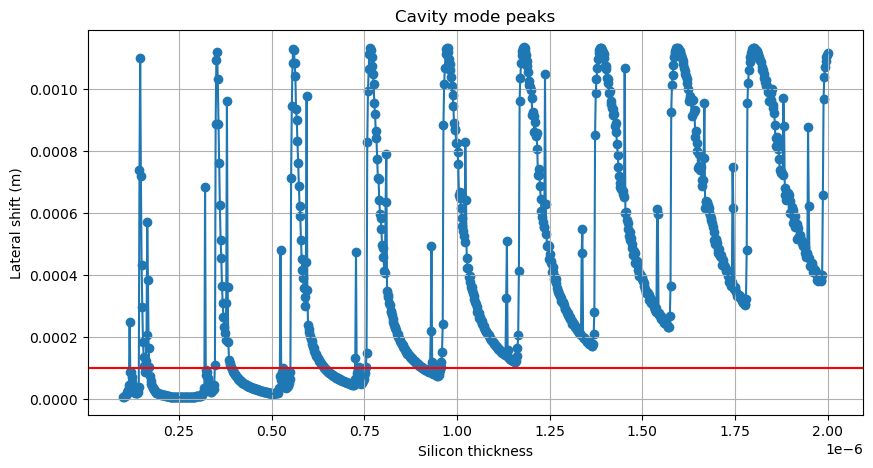

In [60]:
plt.figure(figsize=(10,5))
plt.scatter(cthicks,cgh)
plt.title("Cavity mode peaks")
plt.plot(cthicks,cgh)
plt.xlabel("Silicon thickness")
plt.ylabel("Lateral shift (m)")
plt.grid(True)
plt.axhline(0.0001, color='r')
#plt.xticks(np.linspace(0,1e-6,10))
plt.show()

The lateral shift peaks seem periodic alluding to cavity mode  coupling. But sufficient thickness should result in some decoupling from the lower metal layer. Why then is there a general lateral shift increase for thicker dielectric layers.

In [62]:
clayers[cind_max]

(3e-08, 1.1802802802802802e-06, 3e-08)

In [ ]:
z